[![GitHub Repo stars](https://img.shields.io/github/stars/speechbrain/speechbrain?style=social) *Please, help our community project. Star on GitHub!*](https://github.com/speechbrain/speechbrain)

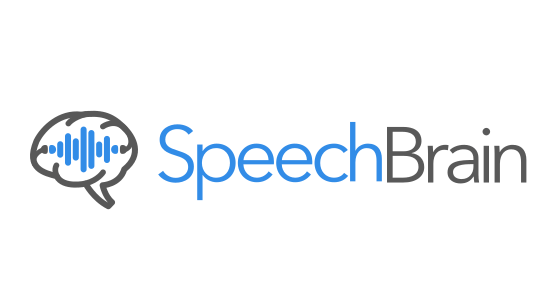

# **What can I do with SpeechBrain?**

SpeechBrain can already do a lot of cool things. You can use SpeechBrain for the following types of problems:

- **speech classification** (many-to-one, e.g. speaker-id)
- **speech regression** (speech-to-speech mapping, e.g, speech enhancement)
- **sequence-to-sequence** (speech to speech mapping, e.g., speech recognition)

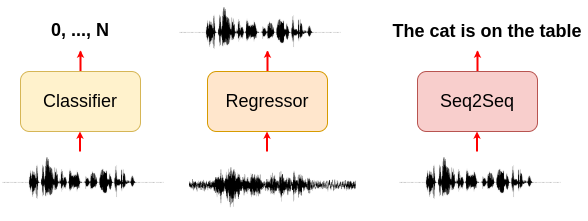

More precisely, SpeechBrain supports many Conversational AI tasks, including the following ones:
- **Speech Recognition**: Speech-to-text ([see this tutorial](https://colab.research.google.com/drive/1aFgzrUv3udM_gNJNUoLaHIm78QHtxdIz?usp=sharing))
- **Speaker Recognition**: Speaker verification/ID ([see this tutorial](https://colab.research.google.com/drive/1UwisnAjr8nQF3UnrkIJ4abBMAWzVwBMh?usp=sharing)).
- **Speaker Diarization**: Detect who spoke when.
- **Speech Enhancement**: Noisy to clean speech ([see this tutorial](https://colab.research.google.com/drive/18RyiuKupAhwWX7fh3LCatwQGU5eIS3TR?usp=sharing)).
- **Speech Separation**: Separate overlapped speech ([see this tutorial](https://colab.research.google.com/drive/1YxsMW1KNqP1YihNUcfrjy0zUp7FhNNhN?usp=sharing)).
- **Spoken Language Understanding**: Speech to intent/slots.
- **Multi-microphone processing**: Combining input signals ([see this tutorial](https://colab.research.google.com/drive/1UVoYDUiIrwMpBTghQPbA6rC1mc9IBzi6?usp=sharing)).

Many other systems are yet to come. For all this tasks we provide recipes that allow users training a model from scratch. We made available all the pre-trained model and logs for all the experiments [here](https://drive.google.com/drive/folders/1ZVuROxR711Xib2MsJbcPla4PWqbK1Ddw?usp=sharing).

The standard way to train your model from scratch with SpeechBrain is the following:


```bash
cd recipe/dataset_name/task_name

python train.py train.yaml --data_folder=/path/of/your/data
```

Please, refer to the aforementioned tutorial for more information about training.



 In this brief tutorial, we just show how to use some of the pre-trained models made available on [HuggingFace](https://huggingface.co/speechbrain/). First of all, let's install SpeechBrain:

In [3]:
%%capture
# Installing SpeechBrain via pip
BRANCH = 'develop'
!python -m pip install git+https://github.com/speechbrain/speechbrain.git@$BRANCH

In [4]:
%%capture
%cd /content
!wget -O example_mandarin.wav "https://www.dropbox.com/scl/fi/7jn7jg9ea2u6d9d70657z/example_mandarin.wav?rlkey=eh220qallihxp9yppm2kx7a2i&dl=1"
!wget -O example_rw.mp3 "https://www.dropbox.com/scl/fi/iplkymn8c8mbc6oclxem3/example_rw.mp3?rlkey=yhmqfsn8q43pmvd1uvjo3yl0s&dl=1"
!wget -O example_whamr.wav "https://www.dropbox.com/scl/fi/gxbtbf3c3hxr0y9dbf0nw/example_whamr.wav?rlkey=1wt5d49kjl36h0zypwrmsy8nz&dl=1"
!wget -O example-fr.wav "https://www.dropbox.com/scl/fi/vjn98vu8e3i2mvsw17msh/example-fr.wav?rlkey=vabmu4fgqp60oken8aosg75i0&dl=1"
!wget -O example-it.wav "https://www.dropbox.com/scl/fi/o3t7j53s7czaob8yq73rz/example-it.wav?rlkey=x9u6bkbcp6lh3602fb9uai5h3&dl=1"
!wget -O example.wav "https://www.dropbox.com/scl/fi/uws97livpeta7rowb7q7g/example.wav?rlkey=swppq2so15jibmpmihenrktbt&dl=1"
!wget -O example1.wav "https://www.dropbox.com/scl/fi/mu1tdejny4cbgxczwm944/example1.wav?rlkey=8pi7hjz15syvav80u1xzfbfhn&dl=1"
!wget -O example2.flac "https://www.dropbox.com/scl/fi/k9ouk6ec1q1fkevamodrn/example2.flac?rlkey=vtbyc6bzp9hknzvn9rb63z3yf&dl=1"
!wget -O test_mixture.wav "https://www.dropbox.com/scl/fi/4327g66ajs8aq3dck0fzn/test_mixture.wav?rlkey=bjdcw3msxw3armpelxuayug5i&dl=1"

Once installed, you should be able to import the speechbrain project with python:

In [5]:
import speechbrain as sb
from speechbrain.dataio.dataio import read_audio
from IPython.display import Audio

## **Speech Recognition on Different Languages**

### *English*

In [6]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-rnnlm-librispeech", savedir="pretrained_models/asr-crdnn-rnnlm-librispeech")
asr_model.transcribe_file('/content/example.wav')

hyperparams.yaml:   0%|          | 0.00/4.83k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.41k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/480M [00:00<?, ?B/s]

lm.ckpt:   0%|          | 0.00/212M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/253k [00:00<?, ?B/s]

'THE BIRCH CANOE SLID ON THE SMOOTH PLANKS'

In [7]:
signal = read_audio("/content/example.wav").squeeze()
Audio(signal, rate=16000)

## *French*

In [8]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-fr", savedir="pretrained_models/asr-crdnn-commonvoice-fr")
asr_model.transcribe_file("/content/example-fr.wav")

hyperparams.yaml:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/593M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/245k [00:00<?, ?B/s]

'MON CHIEN EST LE PLUS BEAU'

In [9]:
signal = read_audio("/content/example-fr.wav").squeeze()
Audio(signal, rate=44100)

## *Italian*

In [10]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-crdnn-commonvoice-it", savedir="pretrained_models/asr-crdnn-commonvoice-it")
asr_model.transcribe_file("/content/example-it.wav")

hyperparams.yaml:   0%|          | 0.00/3.90k [00:00<?, ?B/s]

normalizer.ckpt:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/593M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/245k [00:00<?, ?B/s]

'BUONGIORNO A TUTTI E BENVENUTI A BORDO'

In [11]:
signal = read_audio("/content/example-it.wav").squeeze()
Audio(signal, rate=16000)

## *Mandarin*

In [12]:
from speechbrain.inference.interfaces import foreign_class

asr_model = foreign_class(source="speechbrain/asr-wav2vec2-ctc-aishell",  pymodule_file="custom_interface.py", classname="CustomEncoderDecoderASR")
asr_model.transcribe_file("/content/example_mandarin.wav")

hyperparams.yaml:   0%|          | 0.00/2.30k [00:00<?, ?B/s]

custom_interface.py:   0%|          | 0.00/4.82k [00:00<?, ?B/s]

The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/110k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/269k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/624 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/2.26k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at TencentGameMate/chinese-wav2vec2-large and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

wav2vec2.ckpt:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/99.3M [00:00<?, ?B/s]

['她', '应', '该', '也', '是', '喜', '欢']

In [13]:
signal = read_audio("/content/example_mandarin.wav").squeeze()
Audio(signal, rate=16000)

## *Kinyarwanda*

In [14]:
from speechbrain.inference.ASR import EncoderDecoderASR

asr_model = EncoderDecoderASR.from_hparams(source="speechbrain/asr-wav2vec2-commonvoice-rw", savedir="pretrained_models/asr-wav2vec2-commonvoice-rw")
asr_model.transcribe_file("/content/example_rw.mp3")

hyperparams.yaml:   0%|          | 0.00/3.12k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.77k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.27G [00:00<?, ?B/s]

Some weights of Wav2Vec2Model were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53 and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


preprocessor_config.json:   0%|          | 0.00/212 [00:00<?, ?B/s]

wav2vec2.ckpt:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

asr.ckpt:   0%|          | 0.00/64.9M [00:00<?, ?B/s]

tokenizer.ckpt:   0%|          | 0.00/253k [00:00<?, ?B/s]

'ABAMUGARIYE KU RUGAMBA BAFASHWA KUBONA INSIMBURANGINGO'

In [15]:
signal = read_audio("/content/example_rw.mp3").squeeze()
Audio(signal, rate=44100)

## **Speech Separation**

We here show a mixture with 2 speakers, but we have a state-of-the-art system for separating mixture with 3 speakers as well. We also have models that deals witj noise and reverberation. [See your HuggingFace repository](https://huggingface.co/speechbrain/)

In [16]:
from speechbrain.inference.separation import SepformerSeparation as separator

model = separator.from_hparams(source="speechbrain/sepformer-wsj02mix", savedir='pretrained_models/sepformer-wsj02mix')
est_sources = model.separate_file(path='/content/test_mixture.wav')

hyperparams.yaml:   0%|          | 0.00/1.51k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.2k [00:00<?, ?B/s]

In [17]:
signal = read_audio("/content/test_mixture.wav").squeeze()
Audio(signal, rate=8000)

In [18]:
Audio(est_sources[:, :, 0].detach().cpu().squeeze(), rate=8000)

In [19]:
Audio(est_sources[:, :, 1].detach().cpu().squeeze(), rate=8000)

## **Speech Enhancement**
The goal of speech enhancement is to remove the noise that affects a recording.
Speechbrain has several systems for speech enhancement. In the following, you can find an example processed by the SepFormer (the version trained to perform enhancement):

In [20]:
from speechbrain.inference.separation import SepformerSeparation as separator
import torchaudio

model = separator.from_hparams(source="speechbrain/sepformer-whamr-enhancement", savedir='pretrained_models/sepformer-whamr-enhancement4')
enhanced_speech = model.separate_file(path='/content/example_whamr.wav')


hyperparams.yaml:   0%|          | 0.00/1.44k [00:00<?, ?B/s]

encoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

masknet.ckpt:   0%|          | 0.00/113M [00:00<?, ?B/s]

decoder.ckpt:   0%|          | 0.00/17.3k [00:00<?, ?B/s]

In [21]:
signal = read_audio("/content/example_whamr.wav").squeeze()
Audio(signal, rate=8000)

In [22]:
Audio(enhanced_speech[:, :].detach().cpu().squeeze(), rate=8000)

# **Speaker Verification**
The task here is to determine whether two sentences belong to the same speaker or not.

In [23]:
from speechbrain.inference.speaker import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb", savedir="pretrained_models/spkrec-ecapa-voxceleb")
score, prediction = verification.verify_files("/content/example1.wav", "/content/example2.flac")

print(prediction, score)

hyperparams.yaml:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

embedding_model.ckpt:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

mean_var_norm_emb.ckpt:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

classifier.ckpt:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

label_encoder.txt:   0%|          | 0.00/129k [00:00<?, ?B/s]

tensor([False]) tensor([0.1799])


In [24]:
signal = read_audio("/content/example1.wav").squeeze()
Audio(signal, rate=16000)

In [25]:
signal = read_audio("/content/example2.flac").squeeze()
Audio(signal, rate=16000)

## **Speech Synthesys (Text-to-Speech)**
The goal of speech synthesys is to create a speech signal from the input text.
If the following you can find an example with the popular [Tacotron2](https://arxiv.org/abs/1712.05884) model coupled with [HiFiGAN](https://arxiv.org/abs/2010.05646) as a vocoder:

In [30]:
import torchaudio
from speechbrain.inference.TTS import Tacotron2
from speechbrain.inference.vocoders import HIFIGAN

# Intialize TTS (tacotron2) and Vocoder (HiFIGAN)
tacotron2 = Tacotron2.from_hparams(source="speechbrain/tts-tacotron2-ljspeech", savedir="tmpdir_tts")
hifi_gan = HIFIGAN.from_hparams(source="speechbrain/tts-hifigan-ljspeech", savedir="tmpdir_vocoder")

# Running the TTS
mel_output, mel_length, alignment = tacotron2.encode_text("Hi this is an experimental setup to start generating voice related work in morgan stanley")

# Running Vocoder (spectrogram-to-waveform)
waveforms = hifi_gan.decode_batch(mel_output)

In [37]:
Audio(waveforms.detach().cpu().squeeze(), rate=15050)

## **Other Tasks**
We support several other tasks. Click at the link below to see the pretrained model and the easy-inference function:

- [Speech Enhancement](https://huggingface.co/speechbrain/metricgan-plus-voicebank)
- [Command Recognition](https://huggingface.co/speechbrain/google_speech_command_xvector)
- [Spoken Language Understanding](https://huggingface.co/speechbrain/slu-timers-and-such-direct-librispeech-asr)
- [Urban Sound Classification](https://huggingface.co/speechbrain/urbansound8k_ecapa)

# **About SpeechBrain**
- Website: https://speechbrain.github.io/
- Code: https://github.com/speechbrain/speechbrain/
- HuggingFace: https://huggingface.co/speechbrain/


# **Citing SpeechBrain**
Please, cite SpeechBrain if you use it for your research or business.

```bibtex
@misc{speechbrain,
  title={{SpeechBrain}: A General-Purpose Speech Toolkit},
  author={Mirco Ravanelli and Titouan Parcollet and Peter Plantinga and Aku Rouhe and Samuele Cornell and Loren Lugosch and Cem Subakan and Nauman Dawalatabad and Abdelwahab Heba and Jianyuan Zhong and Ju-Chieh Chou and Sung-Lin Yeh and Szu-Wei Fu and Chien-Feng Liao and Elena Rastorgueva and François Grondin and William Aris and Hwidong Na and Yan Gao and Renato De Mori and Yoshua Bengio},
  year={2021},
  eprint={2106.04624},
  archivePrefix={arXiv},
  primaryClass={eess.AS},
  note={arXiv:2106.04624}
}
```